[' anold-chiari-malformation', ' arachnoid-cyst', ' cerebellah-hypoplasia', ' colphocephaly', ' encephalocele', ' holoprosencephaly', ' hydracenphaly', ' intracranial-hemorrdge', ' intracranial-tumor', ' m-magna', ' mild-ventriculomegaly', ' moderate-ventriculomegaly', ' normal', ' polencephaly', ' severe-ventriculomegaly', ' vein-of-galen']
Class A: ' mild-ventriculomegaly' -- Num Samples: 24
Class B: ' normal' -- Num Samples: 24

--- Centroids ---
 mild-ventriculomegaly centroid: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 normal centroid: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]

--- Spread (std deviation, elementwise) ---
 mild-ventriculomegaly std: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] | Spread Norm: 0.0000
 normal std: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] | Spread Norm: 0.0000

Interclass centroid distance ( mild-ventriculomegaly vs  normal): 1.4142


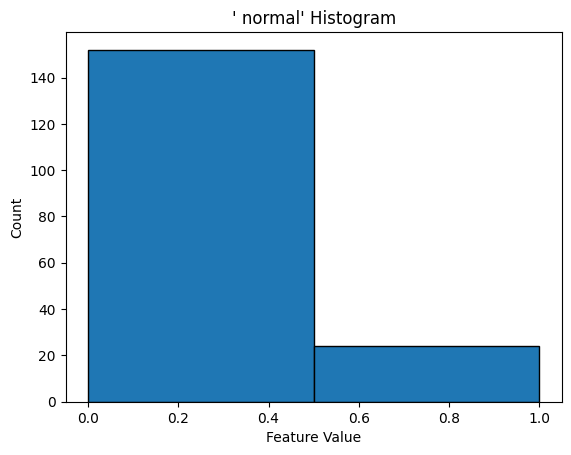

Histogram counts: [152  24]
Histogram bin edges: [0.  0.5 1. ]
Mean of ' normal': 0.13636363636363635
Variance of ' normal': 0.11776859504132231


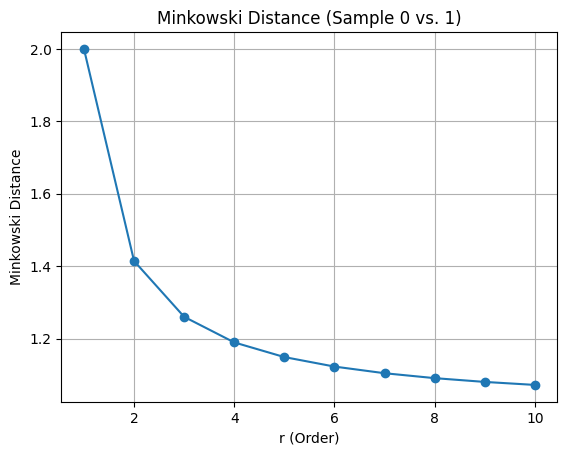

Sample 0 vector: [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
Sample 1 vector: [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
Minkowski distances for r=1..10: [np.float64(2.0), np.float64(1.4142135623730951), np.float64(1.2599210498948732), np.float64(1.189207115002721), np.float64(1.148698354997035), np.float64(1.122462048309373), np.float64(1.1040895136738123), np.float64(1.0905077326652577), np.float64(1.080059738892306), np.float64(1.0717734625362931)]
Test Accuracy for k=3: 0.500
First 10 Predictions: [1 0 0 1 1 1 1 1 1 1]
First 10 True Labels:  [1 1 1 1 1 1 0 0 0 0]
k=1, Test Accuracy: 0.583
k=2, Test Accuracy: 0.583
k=3, Test Accuracy: 0.500
k=4, Test Accuracy: 0.583
k=5, Test Accuracy: 0.750
k=6, Test Accuracy: 0.833
k=7, Test Accuracy: 0.833
k=8, Test Accuracy: 0.833
k=9, Test Accuracy: 0.667
k=10, Test Accuracy: 0.750
k=11, Test Accuracy: 0.667


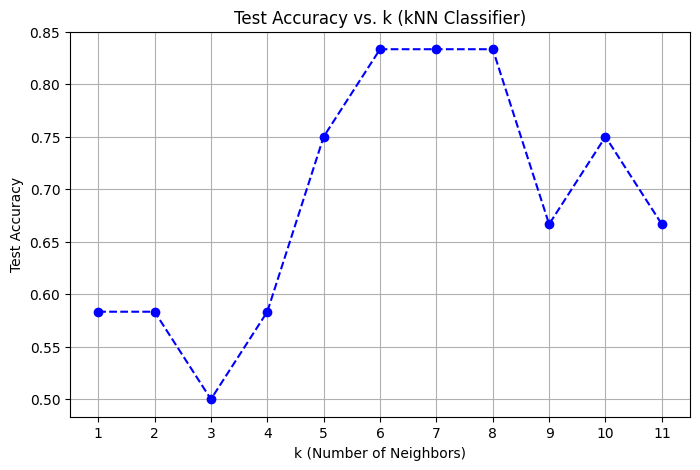

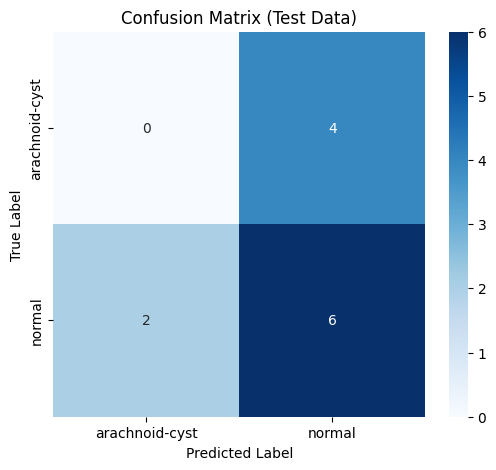

In [1]:
# A1

# your data deals with multiple classes, you can take any two classes. Steps below (refer below 
# diagram for understanding): 
# • Calculate the mean for each class (also called as class centroid) 
# (Suggestion: You may use numpy.mean() function for finding the average vector for all 
# vectors in a given class. Please define the axis property appropriately to use this function. EX: 
# feat_vecs.mean(axis=0)) 
# • Calculate spread (standard deviation) for each class 
# (Suggestion: You may use numpy.std() function for finding the standard deviation vector 
# for all vectors in a given class. Please define the axis property appropriately to use this 
# function.) 
# • Calculate the distance between mean vectors between classes 
# (Suggestion: numpy.linalg.norm(centroid1 – centroid2) gives the Euclidean 
# distance between two centroids.)

import numpy as np
import pandas as pd

def load_class_vectors(path):

    df = pd.read_csv(path)
    class_names = list(df.columns[1:])
    one_hot_vectors = df[class_names].values
    class_vectors_dict = {}
    for idx, class_name in enumerate(class_names):
        mask = one_hot_vectors[:, idx] == 1
        class_vectors = one_hot_vectors[mask]
        class_vectors_dict[class_name] = class_vectors
    return class_names, class_vectors_dict, one_hot_vectors

def compute_class_centroid(class_vectors):

    centroid = np.mean(class_vectors, axis=0)# Compute mean vector (centroid) for clas
    return centroid

def compute_class_spread(class_vectors):

    std_vec = np.std(class_vectors, axis=0)# Compute elementwise standard deviation
    overall_spread = np.linalg.norm(std_vec)# Compute norm of std vector (spread)
    return std_vec, overall_spread

def compute_centroid_distance(centroid1, centroid2):

    return np.linalg.norm(centroid1 - centroid2)# Euclidean distance between centroids



path = "_classes.csv"

class_names, class_vectors_dict, all_label_vectors = load_class_vectors(path)

print(class_names)

class_A = " mild-ventriculomegaly"
class_B = " normal"

vectors_A = class_vectors_dict[class_A]
vectors_B = class_vectors_dict[class_B]


centroid_A = compute_class_centroid(vectors_A)
centroid_B = compute_class_centroid(vectors_B)

std_A, spread_A = compute_class_spread(vectors_A)
std_B, spread_B = compute_class_spread(vectors_B)


interclass_dist = compute_centroid_distance(centroid_A, centroid_B)


print(f"Class A: '{class_A}' -- Num Samples: {len(vectors_A)}")
print(f"Class B: '{class_B}' -- Num Samples: {len(vectors_B)}")
print("\n--- Centroids ---")
print(f"{class_A} centroid: {centroid_A}")
print(f"{class_B} centroid: {centroid_B}")

print("\n--- Spread (std deviation, elementwise) ---")
print(f"{class_A} std: {std_A} | Spread Norm: {spread_A:.4f}")
print(f"{class_B} std: {std_B} | Spread Norm: {spread_B:.4f}")

print(f"\nInterclass centroid distance ({class_A} vs {class_B}): {interclass_dist:.4f}")

# A2

#  Take any feature from your dataset. Observe the density pattern for that feature by plotting the 
# histogram. Use buckets (data in ranges) for histogram generation and study. Calculate the mean and 
# variance from the available data.  
# (Suggestion: numpy.histogram()gives the histogram data. Plot of histogram may be 
# achieved with matplotlib.pyplot.hist()) 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def load_feature_data(path, feature_name):

    df = pd.read_csv(path)
    feature_data = df[feature_name].values
    return feature_data

def get_histogram(feature_data, bins=10):

    hist, bin_edges = np.histogram(feature_data, bins=bins)
    return hist, bin_edges  # Return histogram counts and bin edges

def calculate_mean_variance(feature_data):

    mean = np.mean(feature_data)
    variance = np.var(feature_data)
    return mean, variance

def plot_feature_histogram(feature_data, bins=10, title="Feature Histogram"):

    plt.hist(feature_data, bins=bins, edgecolor='black') # Plot histogram
    plt.title(title)
    plt.xlabel('Feature Value')
    plt.ylabel('Count')
    plt.show()

path = "_classes.csv"
feature_name = " normal"

feature_data = load_feature_data(path, feature_name)


hist_counts, hist_bins = get_histogram(feature_data, bins=[0,0.5,1])

mean, variance = calculate_mean_variance(feature_data)


plot_feature_histogram(feature_data, bins=[0,0.5,1], title=f"'{feature_name}' Histogram")


print(f"Histogram counts: {hist_counts}")
print(f"Histogram bin edges: {hist_bins}")
print(f"Mean of '{feature_name}': {mean}")
print(f"Variance of '{feature_name}': {variance}")
#  A3
# Take any two feature vectors from your dataset. Calculate the Minkwoski distance with r from 1 
# to 10. Make a plot of the distance and observe the nature of this graph. 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_label_vectors(path):

    df = pd.read_csv(path)
    label_vectors = df.iloc[:, 1:].values
    return label_vectors

def minkowski_distance(vec1, vec2, r):

    return np.sum(np.abs(vec1 - vec2) ** r) ** (1 / r) # Compute Minkowski distance

def calculate_minkowski_series(vec1, vec2, r_min, r_max):

    r_values = list(range(r_min, r_max + 1))
    distances = [minkowski_distance(vec1, vec2, r) for r in r_values]  # Compute distances for each r
    return r_values, distances

def plot_minkowski_vs_r(r_values, distances, idx1, idx2):

    plt.figure()
    plt.plot(r_values, distances, marker='o')
    plt.title(f"Minkowski Distance (Sample {idx1} vs. {idx2})")
    plt.xlabel("r (Order)")
    plt.ylabel("Minkowski Distance")
    plt.grid(True)
    plt.show()


path = "_classes.csv"
label_vectors = load_label_vectors(path)


index1, index2 = 0, 1
vector1 = label_vectors[index1]
vector2 = label_vectors[index2]


r_min, r_max = 1, 10
r_vals, dist_vals = calculate_minkowski_series(vector1, vector2, r_min, r_max)

plot_minkowski_vs_r(r_vals, dist_vals, index1, index2)

print(f"Sample {index1} vector: {vector1}")
print(f"Sample {index2} vector: {vector2}")
print("Minkowski distances for r=1..10:", dist_vals)
# A4, A5, A6,A7 ,A8, A9
# A5. Train a kNN classifier (k =3) using the training set obtained from above exercise. Following code 
# for help: 
# A6. Test the accuracy of the kNN using the test set obtained from above exercise. Following code for 
# help. 
# A7. Use the predict() function to study the prediction behavior of the classifier for test vectors. 
# Perform classification for a given vector using neigh.predict(<<test_vect>>). This shall produce the 
# class of the test vector (test_vect is any feature vector from your test set). 
# A8. Make k = 1 to implement NN classifier and compare the results with kNN (k = 3). Vary k from 1 to 
# 11 and make an accuracy plot. 
# A9. Please evaluate confusion matrix for your classification problem. From confusion matrix, the 
# other performance metrics such as precision, recall and F1-Score measures for both training and test 
# data. Based on your observations, infer the models learning outcome (underfit / regularfit / overfit).

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


def load_and_prepare_data(csv_file, class1, class2, n_features=10, random_seed=0):
    """
    Load CSV, strip whitespace from column names,
    filter rows belonging to either class1 or class2,
    generate dummy feature vectors (replace with actual features if available),
    and prepare binary labels for classification:
        label 0 -> class1,
        label 1 -> class2.
    """
    df = pd.read_csv(csv_file)
    # Strip any leading/trailing spaces in columns to avoid KeyError
    df.columns = df.columns.str.strip()
    
    # Filter rows: samples labeled as either class1 or class2
    mask = (df[class1] == 1) | (df[class2] == 1)
    df_bin = df.loc[mask].reset_index(drop=True)
    
    # Generate random dummy features (replace this part with your actual feature extraction)
    np.random.seed(random_seed)
    X = np.random.rand(len(df_bin), n_features)
    
    # Binary labels: 0 for class1, 1 for class2
    y = df_bin[class2].values
    
    return X, y, df_bin

def split_train_test(X, y, test_size=0.3, random_state=42):
    """
    Split the dataset into training and testing sets.
    Stratify to maintain class balance.
    """
    return train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)

def train_knn_classifier(X_train, y_train, k=3):
    """
    Train and return k-Nearest Neighbors classifier.
    """
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    return clf

def get_knn_accuracy(clf, X_test, y_test):
    """
    Return accuracy of kNN classifier on test data.
    """
    return clf.score(X_test, y_test)

def get_knn_predictions(clf, X_test):
    """
    Return predicted labels for test samples.
    """
    return clf.predict(X_test)

# === Main program execution ===

# File path - make sure this points to your classes.csv
csv_path = "_classes.csv"

# Choose two classes for binary classification (must match your CSV columns after stripping)
class1 = "arachnoid-cyst"
class2 = "normal"

# Number of features per sample (dummy random data dimension)
n_features = 10

# --- A4: Load dataset and split into train/test ---
X, y, filtered_df = load_and_prepare_data(csv_path, class1, class2, n_features)
X_train, X_test, y_train, y_test = split_train_test(X, y)

# --- A5: Train kNN classifier (k=3) ---
k = 3
knn_clf = train_knn_classifier(X_train, y_train, k)

# --- A6: Test accuracy on test set ---
accuracy = get_knn_accuracy(knn_clf, X_test, y_test)
print(f"Test Accuracy for k={k}: {accuracy:.3f}")

# --- A7: Predict on test set ---
y_pred = get_knn_predictions(knn_clf, X_test)
print(f"First 10 Predictions: {y_pred[:10]}")
print(f"First 10 True Labels:  {y_test[:10]}")

# A8
# Vary k from 1 to 11, record test accuracy
k_values = list(range(1, 12))
accuracies = []

for k in k_values:
    clf = train_knn_classifier(X_train, y_train, k)
    acc = get_knn_accuracy(clf, X_test, y_test)
    accuracies.append(acc)
    print(f"k={k}, Test Accuracy: {acc:.3f}")

# Plotting the results
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='--', color='b')
plt.title("Test Accuracy vs. k (kNN Classifier)")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Test Accuracy")
plt.grid(True)
plt.xticks(k_values)
plt.show()

# A9
y_test_pred = knn_clf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[class1, class2], yticklabels=[class1, class2])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Test Data)')
plt.show()